In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("placement.csv")

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
df.shape

(100, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [11]:
import matplotlib.pyplot as plt

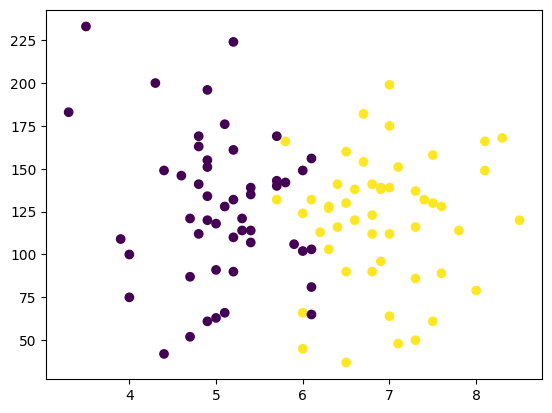

In [14]:
plt.scatter(df['cgpa'],df['iq'] , c= df['placement'])

In [15]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [20]:
x_train

,cgpa,iq
84,5.7,169.0
98,6.3,103.0
48,6.6,138.0
88,4.4,149.0
26,7.0,199.0
...,...,...
39,4.6,146.0
25,5.0,91.0
31,3.9,109.0
1,5.9,106.0


In [21]:
y_train

84    0
98    1
48    1
88    0
26    1
     ..
39    0
25    0
31    0
1     0
15    0
Name: placement, Length: 90, dtype: int64

In [22]:
x_test

,cgpa,iq
64,7.0,64.0
51,4.8,141.0
6,5.7,143.0
45,6.0,66.0
87,5.7,132.0
12,5.4,139.0
43,6.8,141.0
96,4.4,42.0
38,6.5,160.0
23,4.7,87.0


In [23]:
y_test

64    1
51    0
6     0
45    1
87    1
12    0
43    1
96    0
38    1
23    0
Name: placement, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.27848624,  1.11630674],
       [ 0.23829235, -0.55519869],
       [ 0.49668165,  0.33120571],
       [-1.39817319,  0.60978994],
       [ 0.84120071,  1.87608194],
       [-1.13978389, -0.09933357],
       [-0.02009695, -0.02335605],
       [-0.53687554,  0.25522819],
       [-0.02009695, -2.0240974 ],
       [-0.70913507,  2.50922794],
       [ 0.84120071, -0.32726613],
       [-0.96752436,  0.22990235],
       [ 0.06603282, -1.51758061],
       [-0.02009695,  0.60978994],
       [ 0.58281141,  0.73641914],
       [-2.34560061,  1.4708685 ],
       [ 0.15216259, -0.30194029],
       [-1.74269225, -0.63117621],
       [ 0.66894118, -0.32726613],
       [-0.19235648,  1.04032922],
       [-0.8813946 , -0.17531109],
       [-0.79526483, -1.49225477],
       [-0.02009695, -0.58052453],
       [-0.96752436,  0.76174498],
       [ 1.78862813,  0.60978994],
       [ 1.09959   , -0.98573797],
       [ 0.41055188, -0.88443461],
       [-0.27848624,  0.38185739],
       [ 1.3579793 ,

In [27]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.84120071, -1.54290645],
       [-1.05365413,  0.40718323],
       [-0.27848624,  0.45783491],
       [-0.02009695, -1.49225477],
       [-0.27848624,  0.17925067],
       [-0.53687554,  0.35653155],
       [ 0.66894118,  0.40718323],
       [-1.39817319, -2.10007492],
       [ 0.41055188,  0.88837418],
       [-1.13978389, -0.96041213]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
clf.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = clf.predict(x_test)

In [37]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [32]:
y_test

64    1
51    0
6     0
45    1
87    1
12    0
43    1
96    0
38    1
23    0
Name: placement, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

0.8

In [42]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

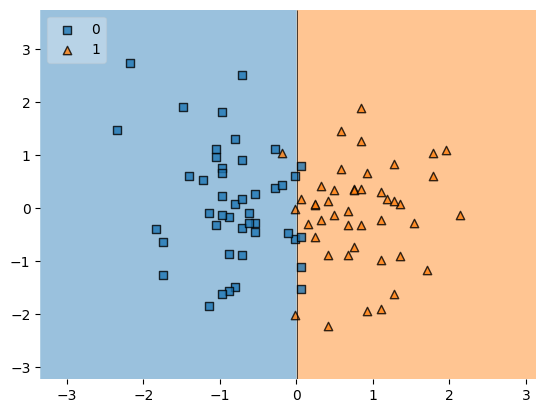

In [44]:
plot_decision_regions(x_train , y_train.values , clf = clf , legend= 2)

In [41]:
! pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
]